# Source Code Final Group Project RAKAMIN

Group 2;

- Mellia Anggraeni <br>
- Burhanuddin Yusuf Robbani <br>
- David Melanius Nai <br>
- Alfath Arrahman <br>
- Moch Agung Laksono <br>
- Dzul Wulan Ningtyas <br>
- Zaima Syarifa Asshafa

## Importing the Relevant Libraries

In [2]:
# library for pre processing dataframe

import pandas as pd
import numpy as np

In [3]:
# library for visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
# for creating the default size of frame

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Importing the Dataset

In [5]:
# Getting the dataset contain Banking Accounts

df_bank = pd.read_csv('G:\Kerja\Rakamin\File\Churn_Modelling.csv')

## Exploratory Data Analysis (Pattern only)

### Descriptive Information

In [14]:
# Getting dataset brief information

df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
# Checking the contain of the dataset

df_bank.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

What we get from this dataset brief information?

- Contain 10000 rows
- Contain 14 columns(feature)
- All columns have correct data types, however, need to convert some of them for the reason of checking the pattern purpose only
- All values is relevant to the correspond column
- All columns do not have missing value.
- Column Exited is our target variable while the others are the features.
- Because the target variable is already represent on the data, then we can do the machine learning with supervised learning method.
- Thus our target variable is represented as binary value (or categorical), therefore, we can use the model such as classification.

In [5]:
# Separating the data feature into categorical and numerical for checking the pattern of their data

## Converting the selected feature from numerical into object

### Converting HasCrCard, IsActiveMember, and Exited feature into object type

df_bank['HasCrCard'] = df_bank['HasCrCard'].astype(str)
df_bank['IsActiveMember'] = df_bank['IsActiveMember'].astype(str)
df_bank['Exited'] = df_bank['Exited'].astype(str)

cats_types = ['object']
nums_types = ['int64', 'float64']

nums_df = df_bank.select_dtypes(include = nums_types)
cats_df = df_bank.select_dtypes(include = cats_types)

categorical = cats_df.columns
numerical = nums_df.columns

print('Below are the categorical features;')
print(categorical)
print('\nBelow are the numerical features;')
print(numerical)

Below are the categorical features;
Index(['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember',
       'Exited'],
      dtype='object')

Below are the numerical features;
Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary'],
      dtype='object')


In [11]:
# Checking information about descriptive statistic from the numerical data

nums_df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts  EstimatedSalary  
count   10000.000000   10000.000000     10000.000000  
mean    76485.889288       1.530200    100090.239881  
std     62397.405202       0.581654     57510.492818  
min         0.000000       1.000000        11.580000  
25%         0.000000       1.000000     51002.110000  
50%     97198.540000       1.000000    100193.915000  
75%    127644.240000       2.000000    149388.247500  
max    250898.090000       4.000000    199992.480000

What could we get from these information?

- CreditScore feature has value ranged from 350 until 850. The difference between the value of its mean and median is very close, hence this feature has normal distribution pattern.
- Age feature has value ranged from 18 yo until 92 yo. The difference between the value of its mean and median is very close, hence this feature has normal distribution pattern.
- Tenure feature has value ranged from 0 month until 10 months. The difference between the value of its mean and median is very close, hence this feature has normal distribution pattern.
- Balance feature has value ranged from "$0K" until "$251K". The difference between the value of its mean and median is likely far, hence this feature has skewed distribution pattern and also has extremely outliers.
- NumOfProducts feature has value ranged from 1 until 4. The difference between the value of its mean and median is close, hence this feature has kind of like normal distribution pattern.
- EstimatedSalary feature has value ranged from "$11K" until "$200K". The difference between the value of its mean and median is very close, hence this feature has normal distribution pattern.

In [12]:
# Checking information about descriptive statistic from the categorical data

cats_df.describe()

Surname Geography Gender HasCrCard IsActiveMember Exited
count    10000     10000  10000     10000          10000  10000
unique    2932         3      2         2              2      2
top      Smith    France   Male         1              1      0
freq        32      5014   5457      7055           5151   7963

What could we get from these information?

- Geography feature has 3 unique values and France is where the most customer's location coming from (50%).
- Gender feature has 2 unique values and many customer coming from Male over female (54%).
- HasCrCard feature is boolean type and we could see mostly customer have credit card in their account (70%).
- IsActiveMember is boolean type and we could see that the bank is closely have the same amount of active members and non-active members (51%:49%).
- Exited is boolean type and we could see that the bank have big churn rate from customer (21%) which is surely the main problem for the business.

### Univariate Analysis

#### Numerical Features

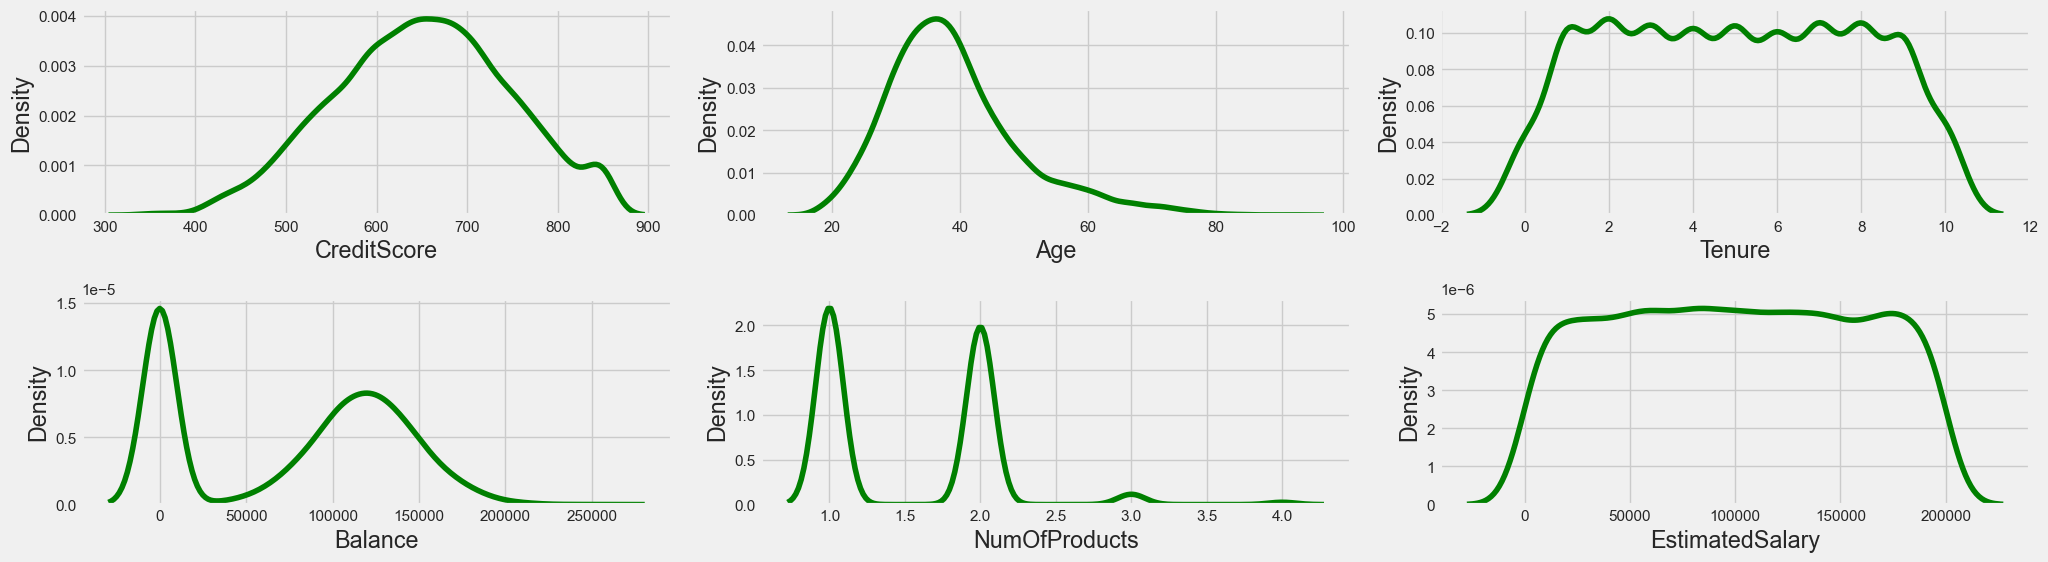

In [25]:
# Check the numerical data shape using kde plot

features = numerical[2:]
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x = df_bank[features[i]], color = 'green')
    plt.tight_layout()

In [19]:
# Checking the distribution values from Tenure feature

df_bank.Tenure.value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

What could we get from all of these plot and information?

- CreditScore feature has normal distribution shape with the central tendency values are around 600 - 700.
- Age feature has normal distribution shape with the central tendency values are around 25 - 45 years old.
- Tenure feature has likely discrete uniform distribution shape because it contains many modes around it, hence, we cannot call this plot as normal distribution and we can assume it fall into categorical feature.
- Balance feature has positvely skewed distribution but with bimodal pattern in zero area and $100K - $150K.
- NumOfProducts feature has bimodal distribution, hence, we cannot call this plot as normal distribution and we can assume it fall into categorical feature.
- EstimatedSalary feature has kind-of-like normal distribution shape with the central tendency values are around $25K - $175K.

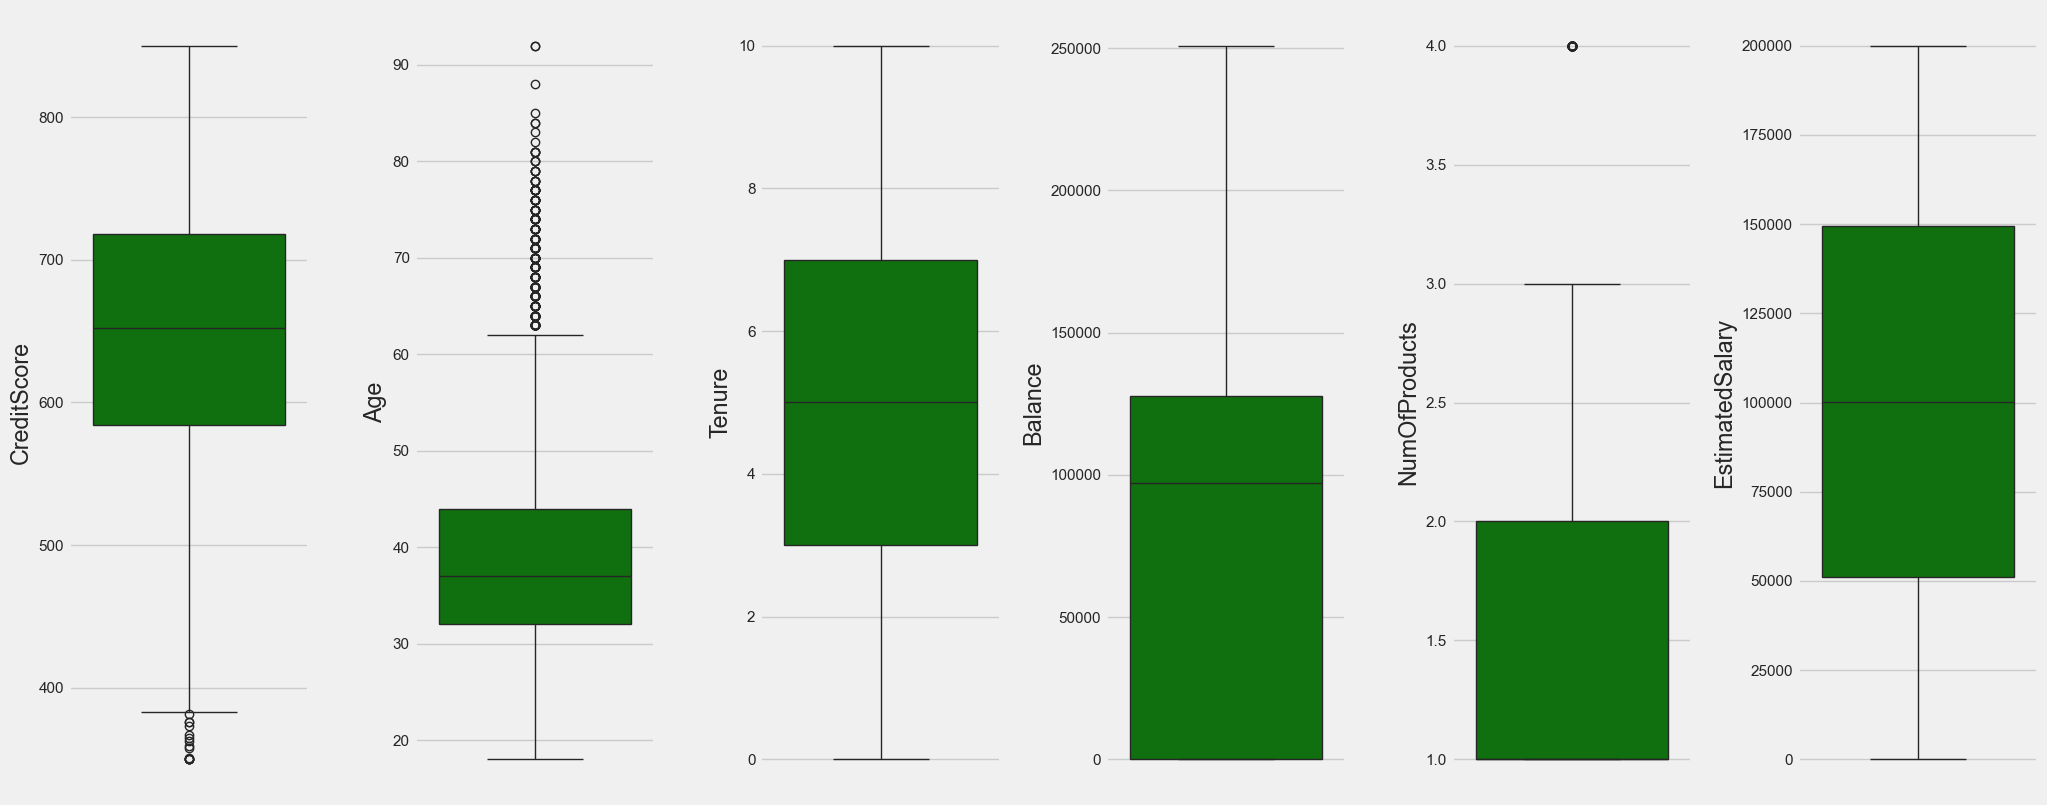

In [30]:
# Check if there's outliers inside the numerical data

features = numerical[2:]
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y = df_bank[features[i]], color = 'green', orient = 'v')
    plt.tight_layout()

What could we get from all these box plot information?

- CreditScore feature has outliers in the beyond of the lower whisker on the boxplot.
- Age feature has outliers in the beyond of the upper whisker on the boxplot.
- Tenure feature has no outliers.
- Balance feature has no outliers.
- NumOfProducts has single outlier in the beyond of the upper whisker on the boxplot.
- EstimatedSalary feature has no outliers.

#### Categorical features

In [6]:
# Converting Tenure and NumOfProducts feature into categorical feature

df_bank['Tenure'] = df_bank['Tenure'].astype(str)
df_bank['NumOfProducts'] = df_bank['NumOfProducts'].astype(str)
cats_df = df_bank.select_dtypes(include = cats_types)
categorical = cats_df.columns

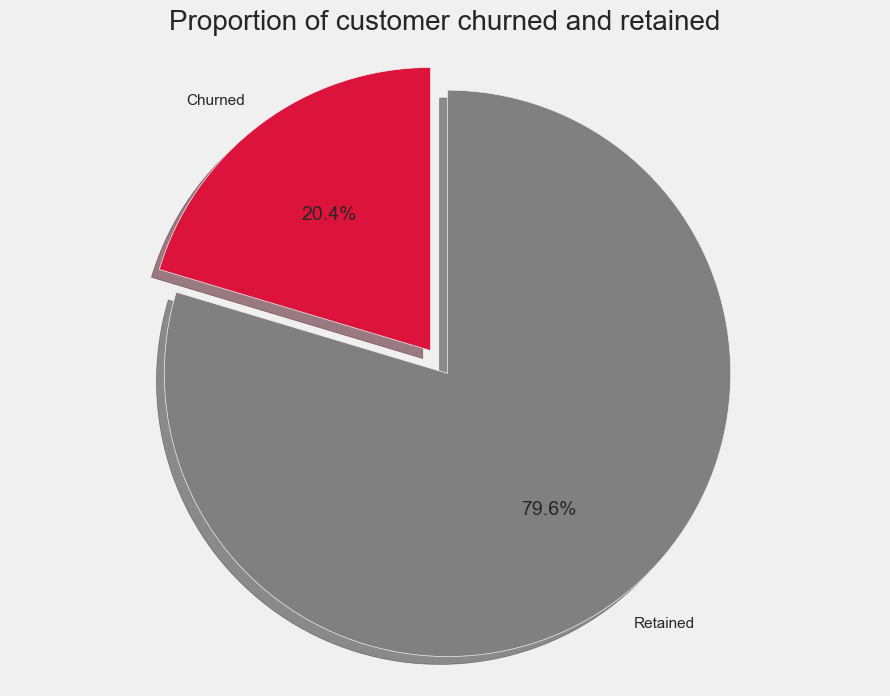

In [18]:
# Check the proportion of the churned customer with not churned customer

labels = 'Churned', 'Retained'
sizes = [df_bank.Exited[df_bank['Exited']==1].count(), df_bank.Exited[df_bank['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['Crimson', 'Grey'])
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

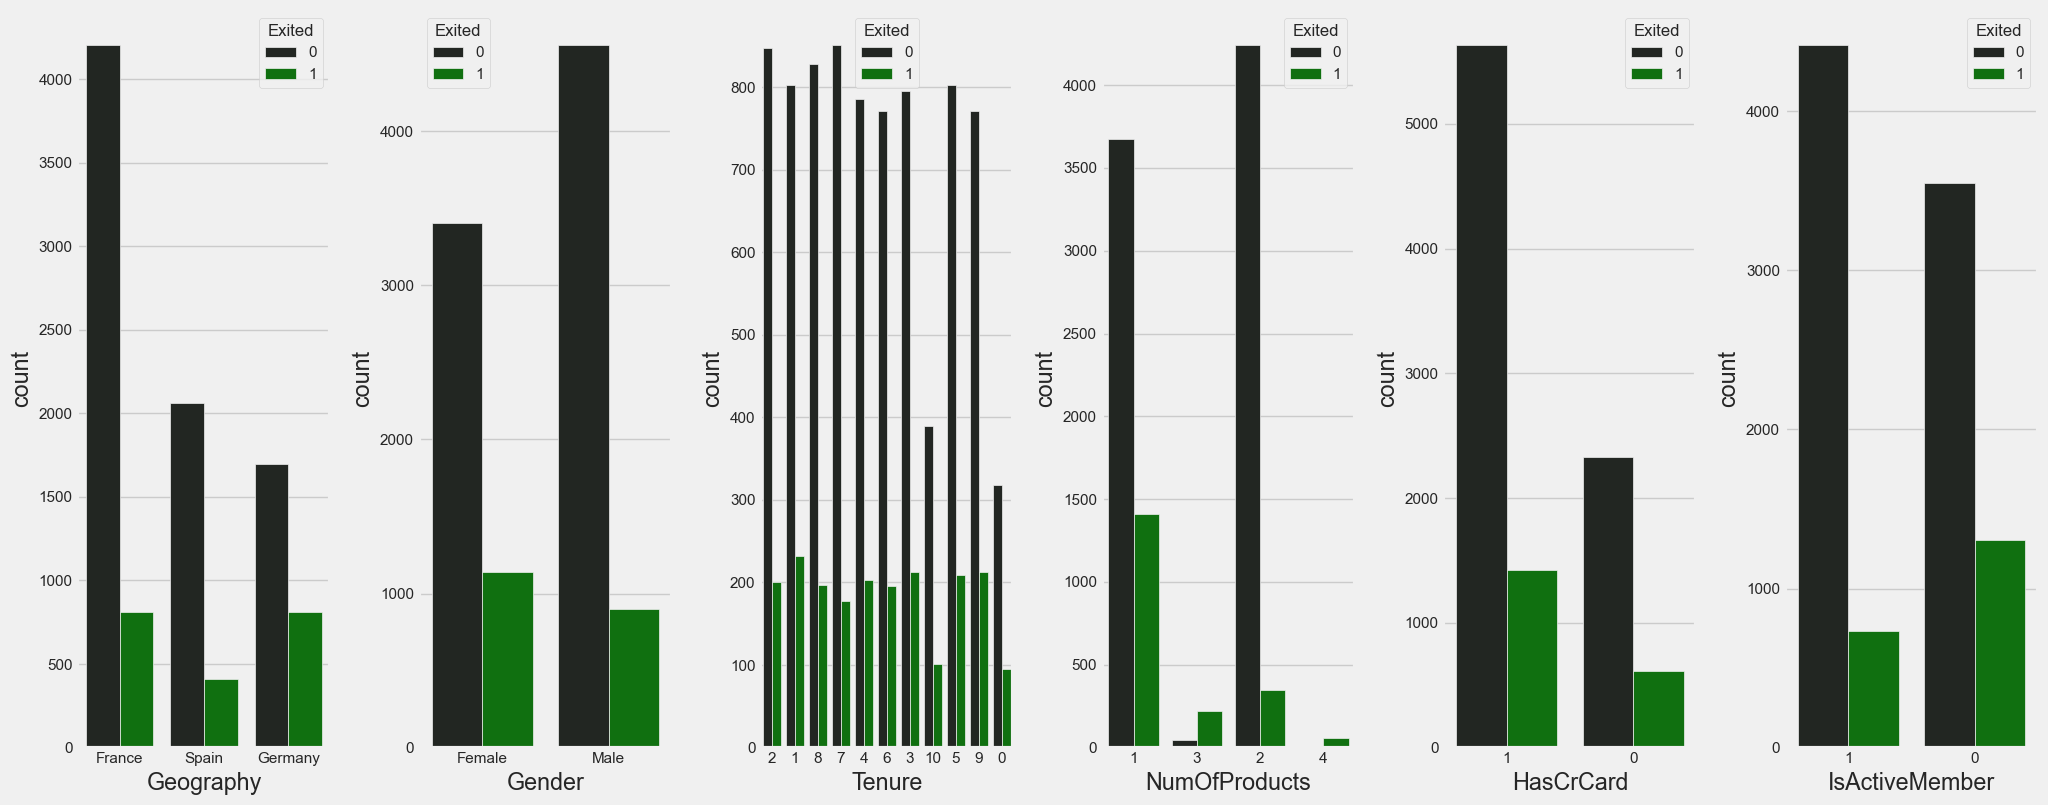

In [61]:
# Check the categorical data shape with countplot

cats = categorical[1:7]
features = cats
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x = df_bank[cats[i]], hue = df_bank['Exited'], palette = 'dark:green')
    plt.tight_layout()

What could we get from all of these plot information?

- Geography feature has 3 locations and France is too dominant over the other two locations, hence this feature is looks like imbalanced but still tolerable for machine learning process.
- Gender feature has 2 values and both of them seems balance although Male customer is often appear in this dataset.
- Tenure feature has 10 values and mostly this feature values is balance to each others except 0 and 10 months but still tolerable for machine learning process.
- NumOfProducts has 2 values that so dominant over the others, hence this feature is imbalance and need to do some tweak for machine learning process.
- HasCrCard has 2 values and mostly customer has more credit card than not having any of it, hence this feature is imbalance and need to some tweak for machine learning process.
- IsActiveMember has 2 values and both of them is likely balance to each other, therefore it can perform well for machine learning process.
- Exited feature is our target variable and yet this variable is imbalance because mostly the customer is not churn for this training model, therefore we need to do some over/undersampling method (or using AUC score) so that the ML model can perform well.

### Multivariate Analysis

#### Numerical Features Vs Numerical Features

<Axes: >

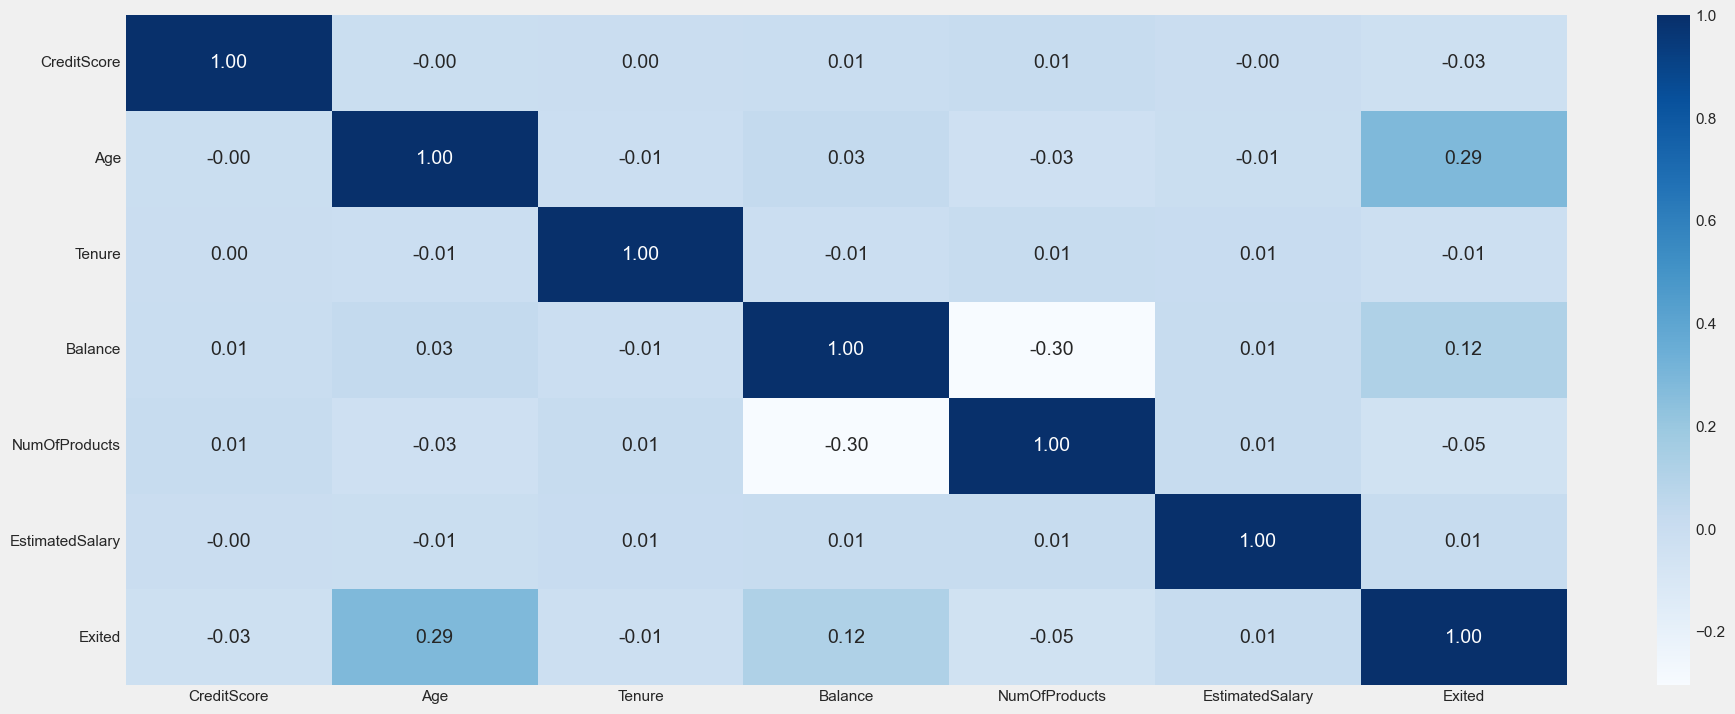

In [34]:
# Checking correlation between each feature for identifying multicolinearity

df_bank['Exited'] = df_bank['Exited'].astype('int64')
df_bank['Tenure'] = df_bank['Tenure'].astype('int64')
df_bank['NumOfProducts'] = df_bank['NumOfProducts'].astype('int64')
nums_df = df_bank.select_dtypes(include = nums_types)
numerical = nums_df.columns
sns.heatmap(df_bank[numerical[2:]].corr(), cmap = 'Blues', annot = True, fmt = '.2f')

What could we get from all of these information?

- All numerical features are more likely have weak correlation towards each other and the target variable (Exited), because of their values are between 0 - 0.3. Therefore, there are no indicate for multicollinearity and can make ML model to increasing its performance.
- The increase of the amount of NumOfProducts tend to lower the customer's balance on their account.
- Increasing CreditScore numbers tend to slightly lower the chance for customer to be churned.
- The older customer tend to getting high chance for them to be churned. This feature is the most that significantly affected the customer to be churned.
- The more amount of tenure that customer have, they tend to slightly lowering the chance for customer to be churned.
- The more amount of balance that customer have, they tend to increasing the chance for customer to be churned. This feature is the second most that significantly affected the customer to be churned.
- More number of products within the customer tend to slightly lowering the chance for customer to be churned.
- The more salary that customer have tend to slightly increasing the chance for customer to be churned.

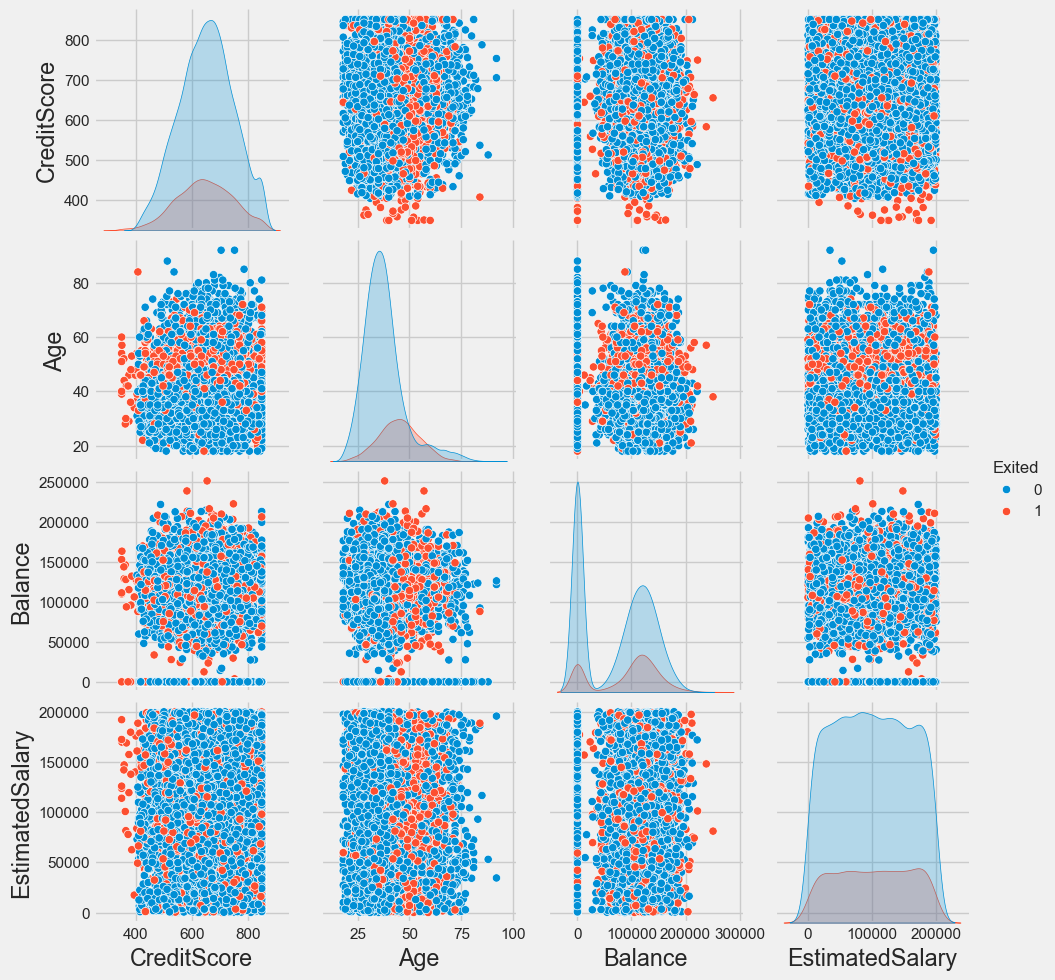

In [35]:
# Relations based on the numerical data feature with the target

df_bank['Tenure'] = df_bank['Tenure'].astype(str)
df_bank['NumOfProducts'] = df_bank['NumOfProducts'].astype(str)
nums_df = df_bank.select_dtypes(include = nums_types)
numerical = nums_df.columns
sns.pairplot(df_bank[numerical[2:]], diag_kind = 'kde', hue = 'Exited')

What could we get from all of these information?

- By looking at the KDE plot, we don't see any segmented in the distribution between churned and non-churned customer. However, there is a difference on central tendency area only in Age feature.
- We also don't see any segmented in the distribution between churned and non-churned customer on all of multivariate analysis.
- Because of many features (except the Age feature on target variable) don't have specific segmented in their distribution, the ML model may decreasing its performance.

#### Categorical Features Vs Numerical Features

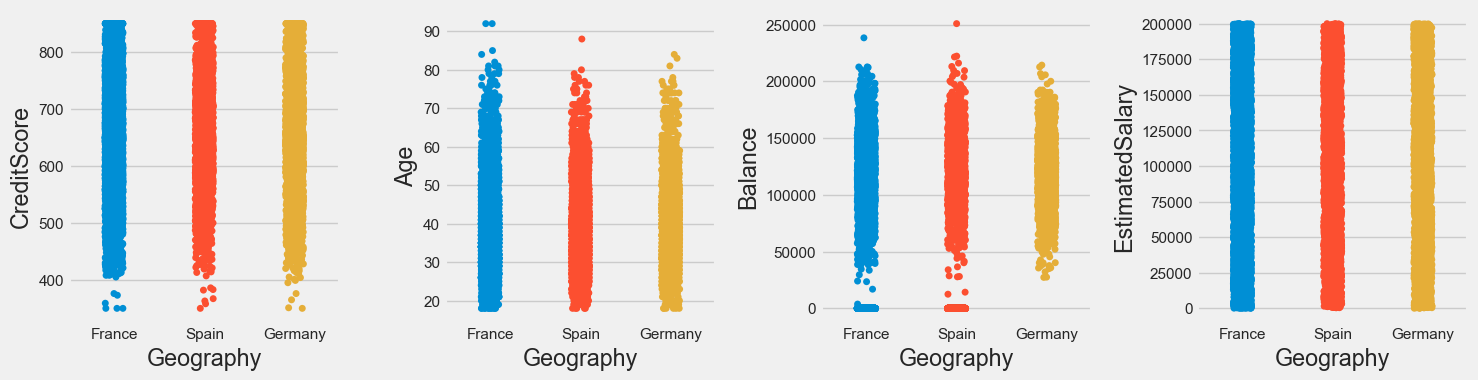

In [41]:
# Checking the distribution data for Geography feature with numerical feature

fig = plt.figure(figsize=(15, 15))
nums = numerical[2:6]
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 4, i+1) 
    sns.stripplot(ax=ax, data=df_bank, x='Geography', hue='Geography', y=nums[i]) 
    plt.tight_layout()

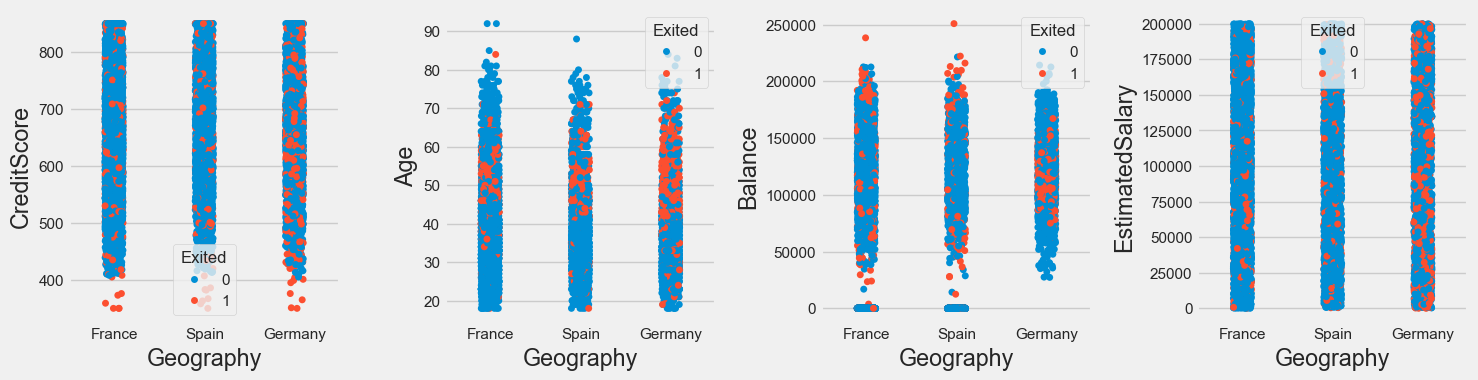

In [42]:
# Checking the distribution data for geography feature with target variable

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 4, i+1) 
    sns.stripplot(ax=ax, data=df_bank, x='Geography', hue='Exited', y=nums[i]) 
    plt.tight_layout()

What could we get from these information?

- Mostly each value inside the geography feature are having similiar distribution toward numerical features.
- Also similiar distribution for each value inside the geography feature toward target variable in multivariate analysis.

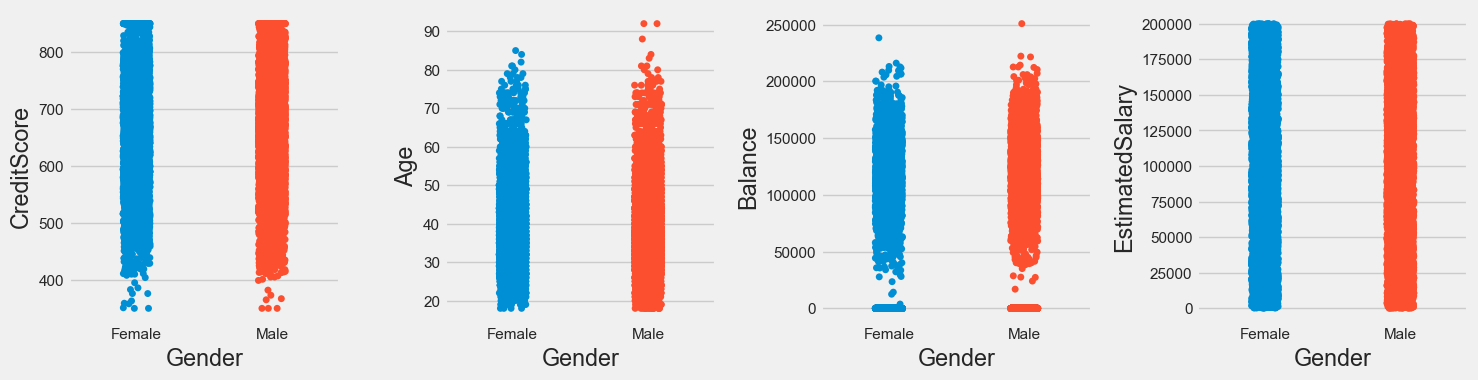

In [43]:
# Checking the distribution data for Gender feature with numerical feature

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 4, i+1) 
    sns.stripplot(ax=ax, data=df_bank, x='Gender', hue='Gender', y=nums[i]) 
    plt.tight_layout()

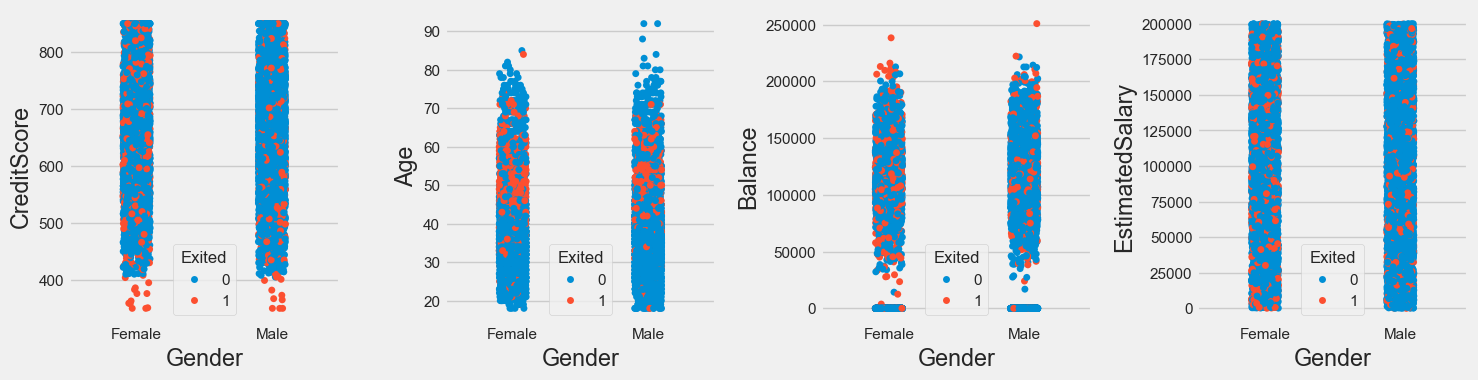

In [44]:
# Checking the distribution data for Gender feature with target variable

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 4, i+1) 
    sns.stripplot(ax=ax, data=df_bank, x='Gender', hue='Exited', y=nums[i]) 
    plt.tight_layout()

What could we get from these information?

- Each value inside the gender feature are having similiar distribution toward numerical features.
- Also similiar distribution for each value inside the gender feature toward target variable in multivariate analysis.

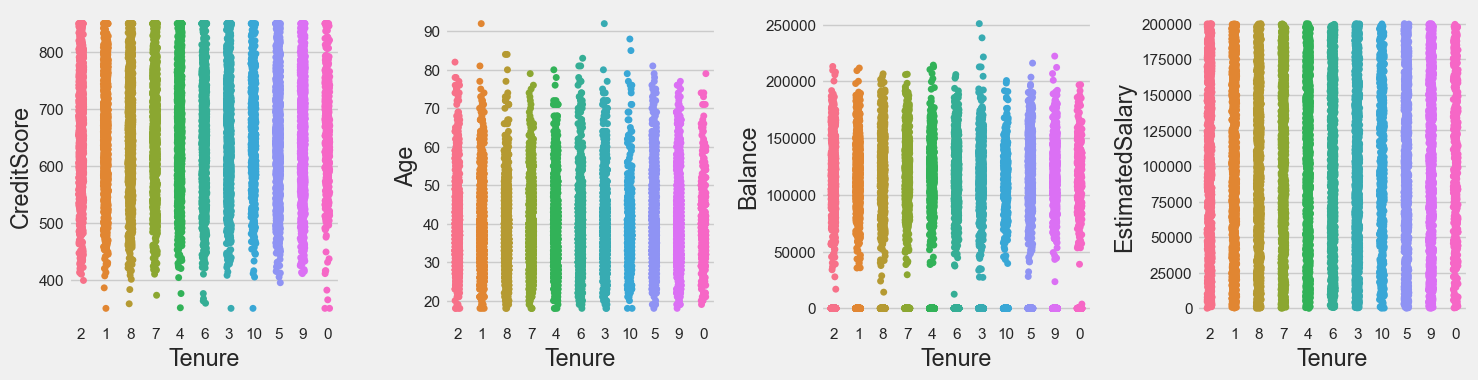

In [45]:
# Checking the distribution data for Tenure feature with numerical feature

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 4, i+1) 
    sns.stripplot(ax=ax, data=df_bank, x='Tenure', hue='Tenure', y=nums[i]) 
    plt.tight_layout()

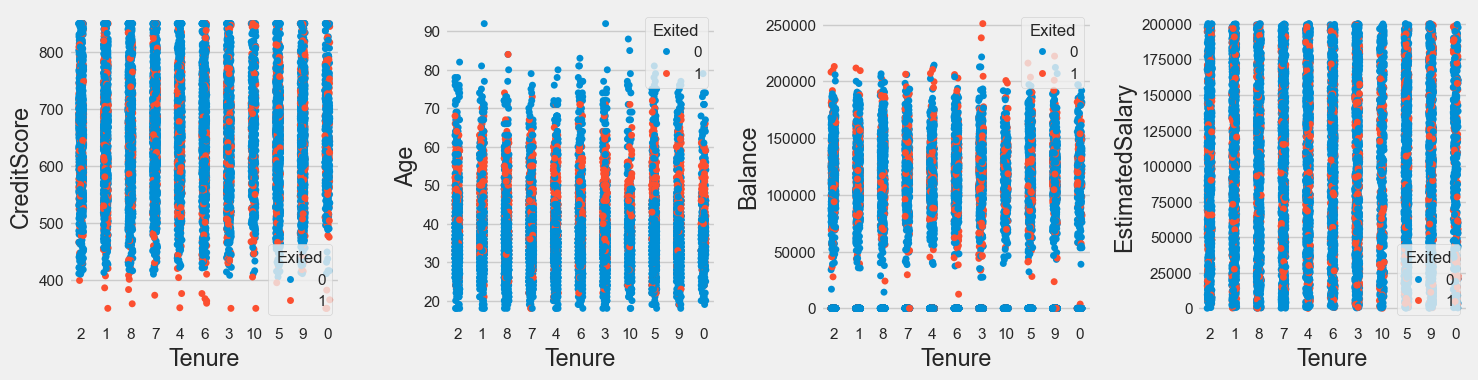

In [48]:
# Checking the distribution data for Tenure feature with target variable

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 4, i+1) 
    sns.stripplot(ax=ax, data=df_bank, x='Tenure', hue='Exited', y=nums[i]) 
    plt.tight_layout()

What could we get from these information?

- Each value inside the tenure feature are having similiar distribution toward numerical features.
- Also similiar distribution for each value inside the tenure feature toward target variable in multivariate analysis.

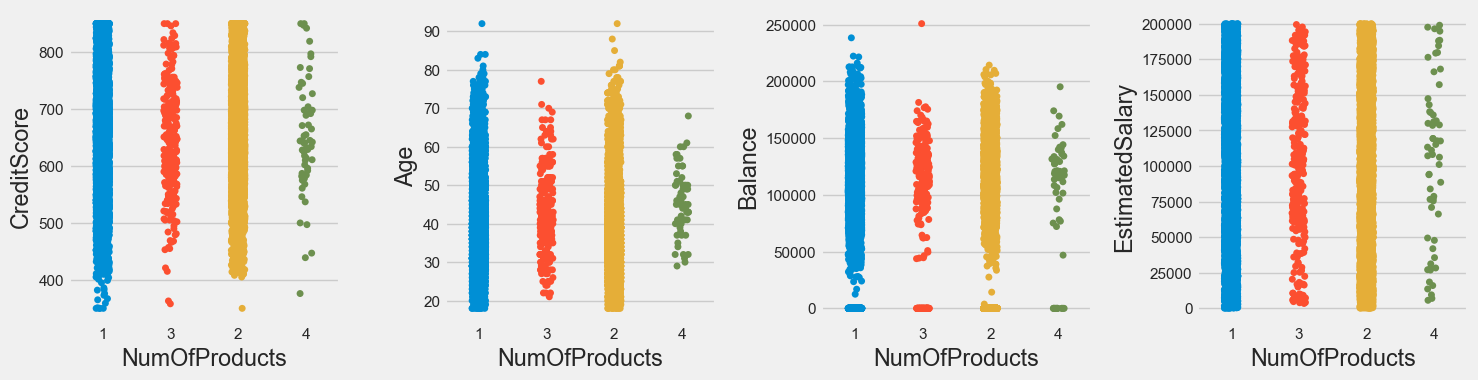

In [49]:
# Checking the distribution data for NumOfProducts feature with numerical feature

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 4, i+1) 
    sns.stripplot(ax=ax, data=df_bank, x='NumOfProducts', hue='NumOfProducts', y=nums[i]) 
    plt.tight_layout()

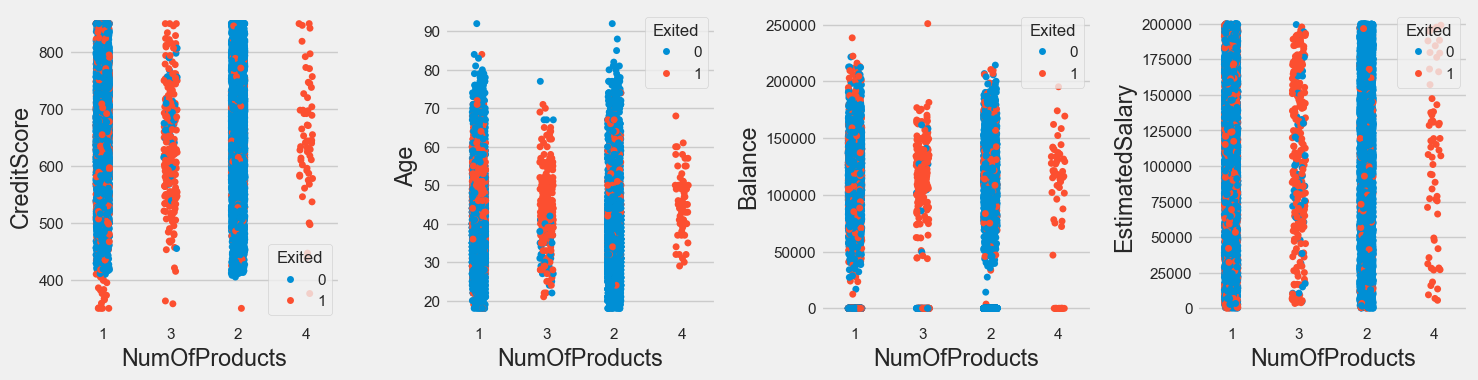

In [50]:
# Checking the distribution data for NumOfProducts feature with target variable

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 4, i+1) 
    sns.stripplot(ax=ax, data=df_bank, x='NumOfProducts', hue='Exited', y=nums[i]) 
    plt.tight_layout()

What could we get from these information?

- Each value inside the NumOfProducts feature are having similiar distribution toward numerical features.
- There are segmented distribution with value more than 2 products toward target variable in multivariate analysis. 

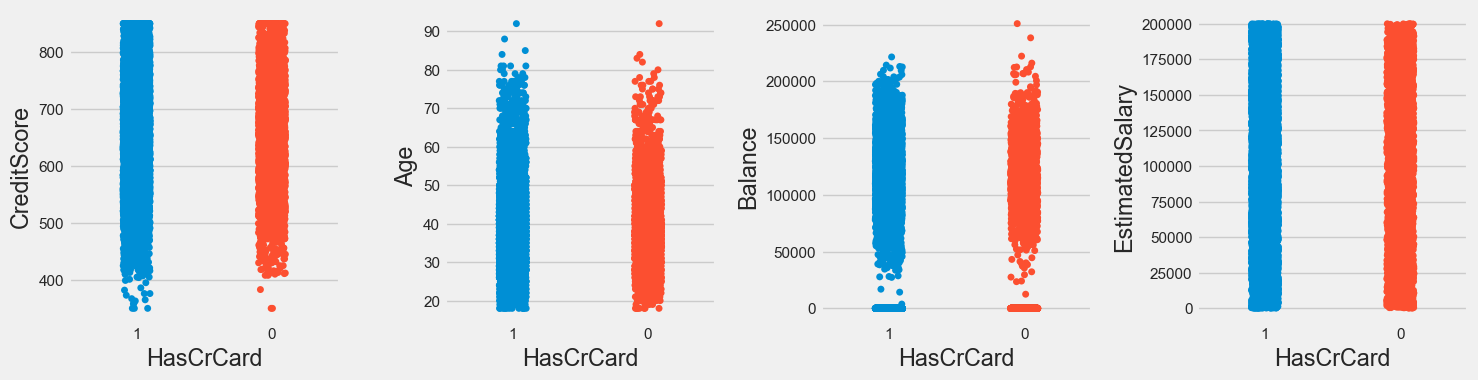

In [51]:
# Checking the distribution data for HasCrCard feature with numerical feature

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 4, i+1) 
    sns.stripplot(ax=ax, data=df_bank, x='HasCrCard', hue='HasCrCard', y=nums[i]) 
    plt.tight_layout()

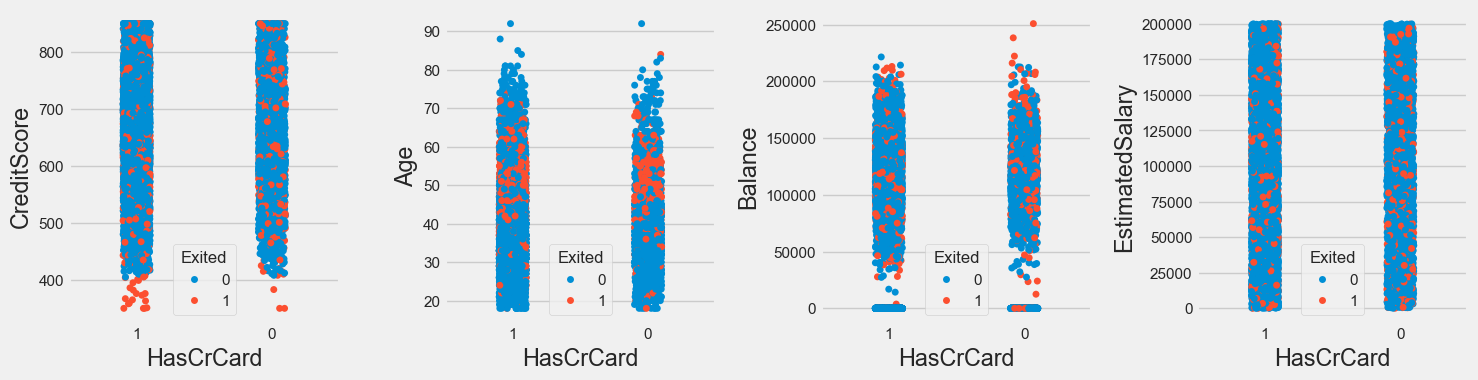

In [52]:
# Checking the distribution data for HasCrCard feature with target variable

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 4, i+1) 
    sns.stripplot(ax=ax, data=df_bank, x='HasCrCard', hue='Exited', y=nums[i]) 
    plt.tight_layout()

What could we get from these information?

- Each value inside the HasCrCard feature are having similiar distribution toward numerical features.
- Also similiar distribution for each value inside the HasCrCard feature toward target variable in multivariate analysis.

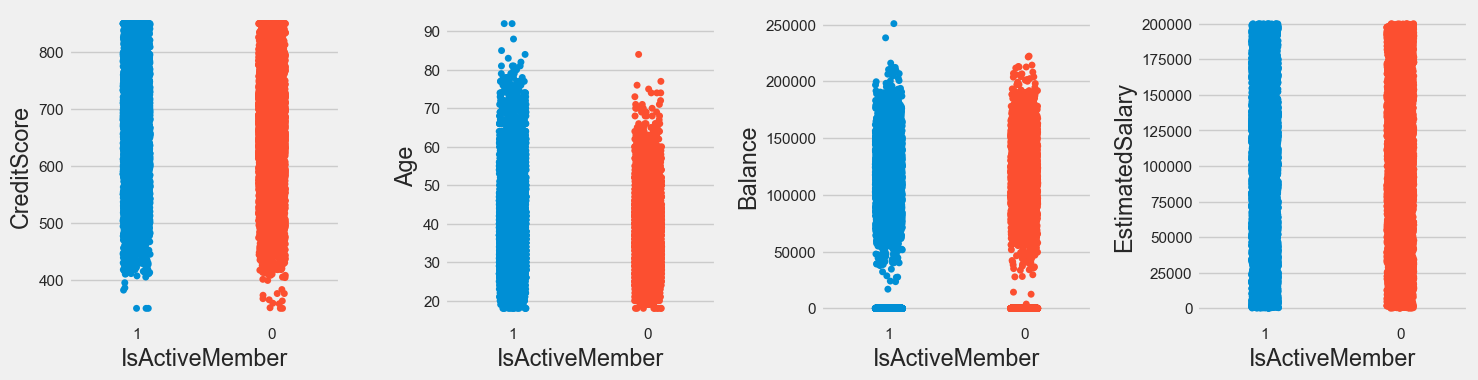

In [53]:
# Checking the distribution data for IsActiveMember feature with numerical feature

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 4, i+1) 
    sns.stripplot(ax=ax, data=df_bank, x='IsActiveMember', hue='IsActiveMember', y=nums[i]) 
    plt.tight_layout()

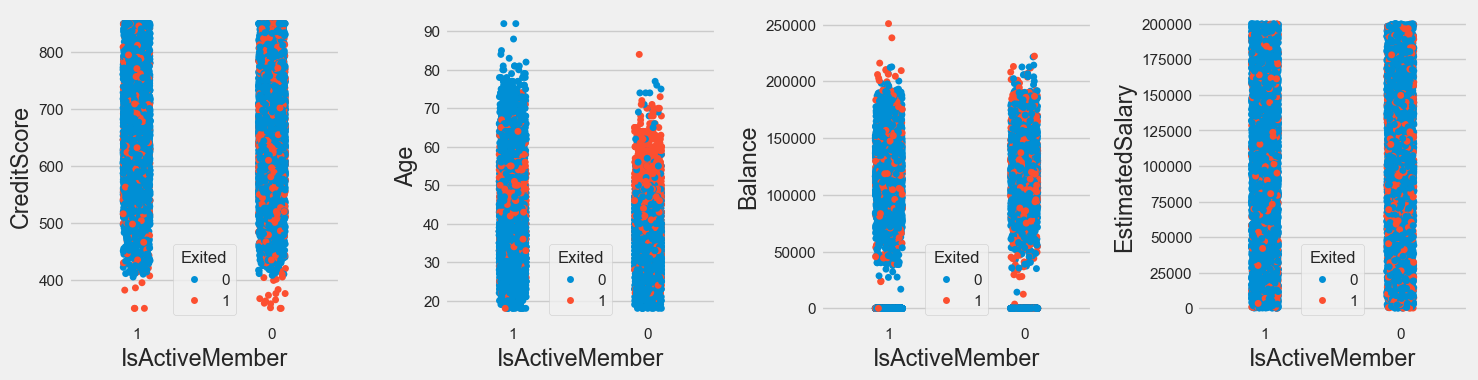

In [54]:
# Checking the distribution data for IsActiveMember feature with target variable

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 4, i+1) 
    sns.stripplot(ax=ax, data=df_bank, x='IsActiveMember', hue='Exited', y=nums[i]) 
    plt.tight_layout()

What could we get from these information?

- Each value inside the IsActiveMember feature are having similiar distribution toward numerical features.
- Also similiar distribution for each value inside the IsActiveMember feature toward target variable in multivariate analysis.

### Initial EDA Conclusion

From all the results of initial EDA analysis, we could do some data pre-processing (i.e data cleansing) for the purpose to gain business insight and preparing the training dataset for ML model.

- Removing some irrelevant features for ML model such as rownumbers, CustomerID (needed for business insight), and Surname.
- Checking if theres any duplicate data inside of it.
- Separating the data into data train and data test with split train or K-Fold cross validation.
- Should we handle the outliers for the CreditScore and Age features?
- Doing some feature engineering to increase the complexity for increasing the model performance.
- Do some data scaling for ML model on CreditScore feature with normalization, Balance feature with normalization/standardization and EstimatedSalary feature with log-transformation.
- Do feature encoding for categorical feature with one-hot encoding on Gender feature and label encoding on Geography feature.
- Do over/undersampling for handling imbalance data on target variable (Exited) or using AUC score.

## Exploratory Data Analysis (Business Insight)

>All of the business insight we did in here are using another tools such as Looker so that the visualization results is more clear and better to represent the insight.

### EDA

#### Proportion of Churned Customer Vs Retained Customer

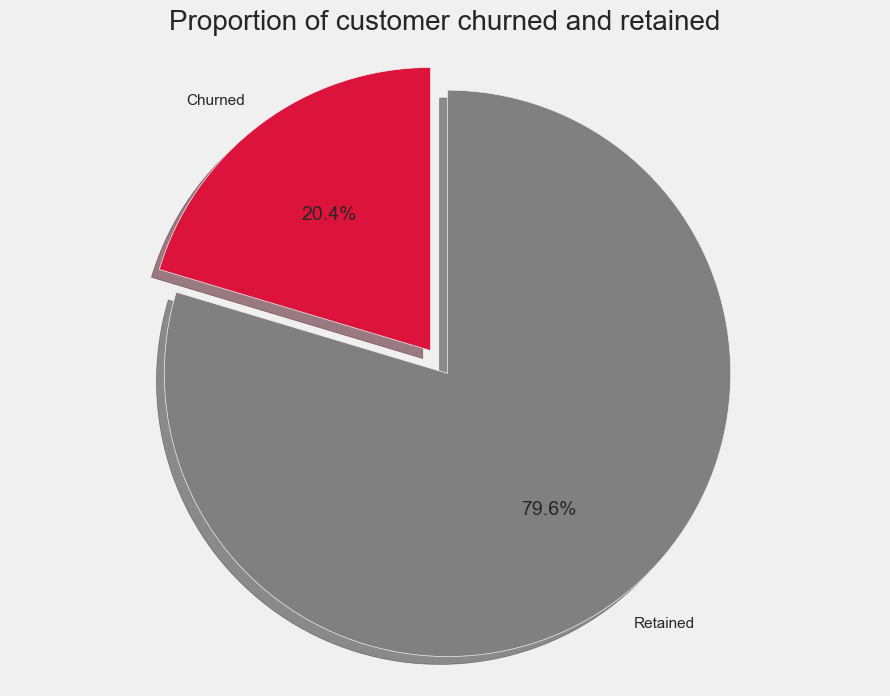

In [6]:
labels = 'Churned', 'Retained'
sizes = [df_bank.Exited[df_bank['Exited']==1].count(), df_bank.Exited[df_bank['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['Crimson', 'Grey'])
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

Insight:

There are approximately 20% customer who don't use the bank product anymore.

#### Total Customer by Credit Score

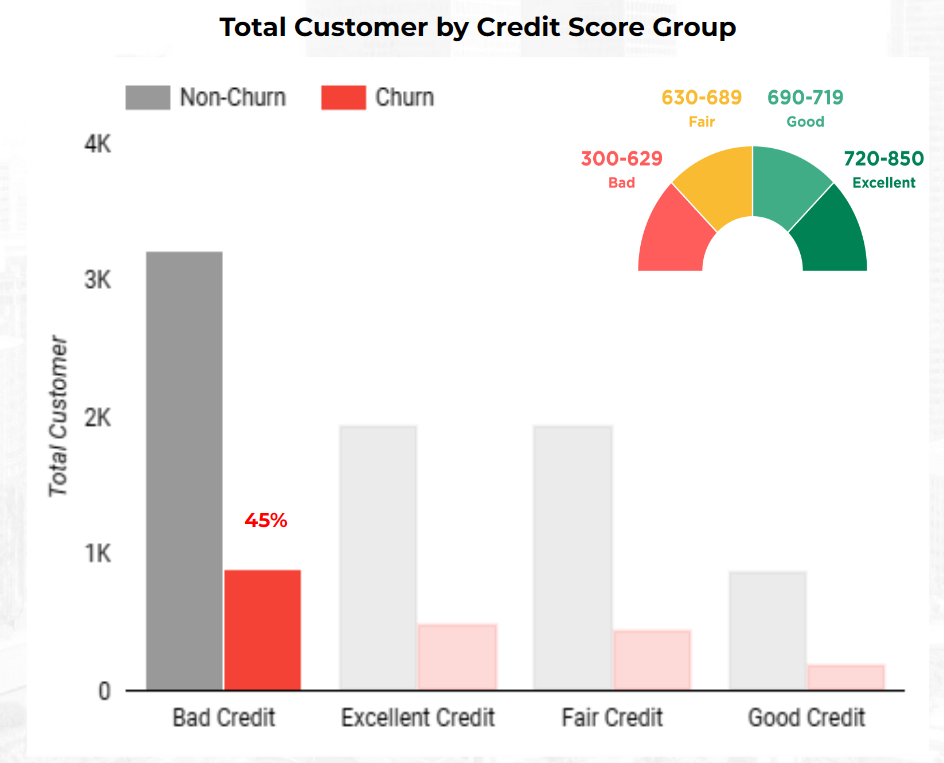

Insight:

All of the credit score group have churned customer inside of it with 45% of them are majority came from bad credit group. <br>
There is a potential that churning will appear again because there are still many retained customer but got a bad credit score.

#### Total Customer by Country

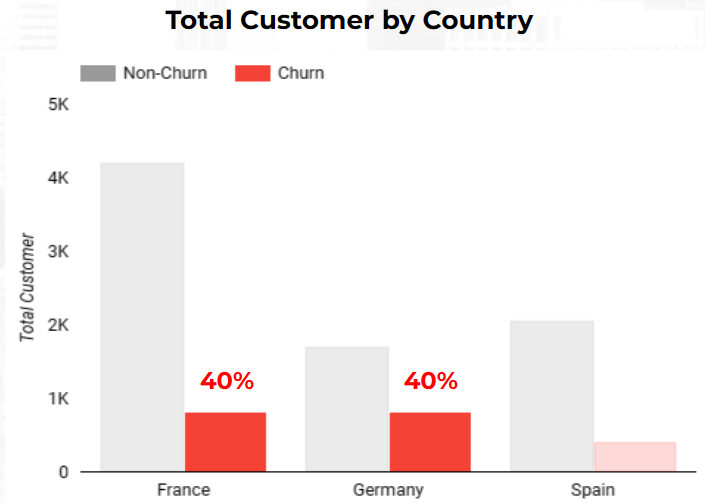

Insight:

With a total of 80% churned customer came from France and Germany, the bank need to keep the retained customer that came from those same country so that they don't migrate into churning.

#### Total Customer by Gender

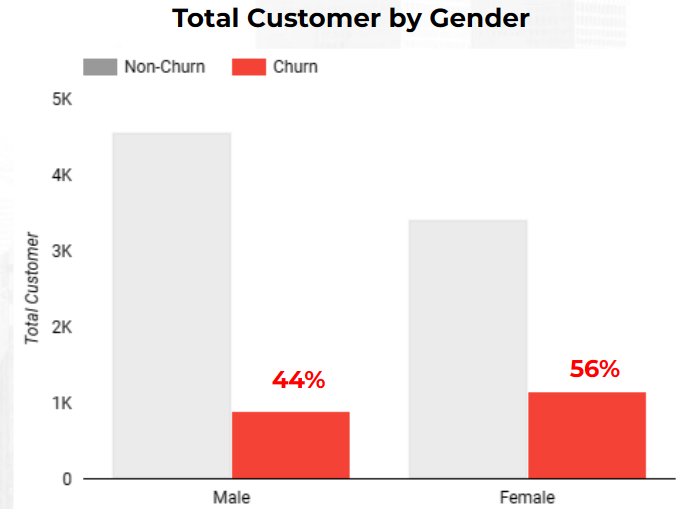

Insight:

56% churned customer came from female. However the bank also need to pay attention to the male customer because they get the most contribute for the retained customer.

#### Total Customer by Generation

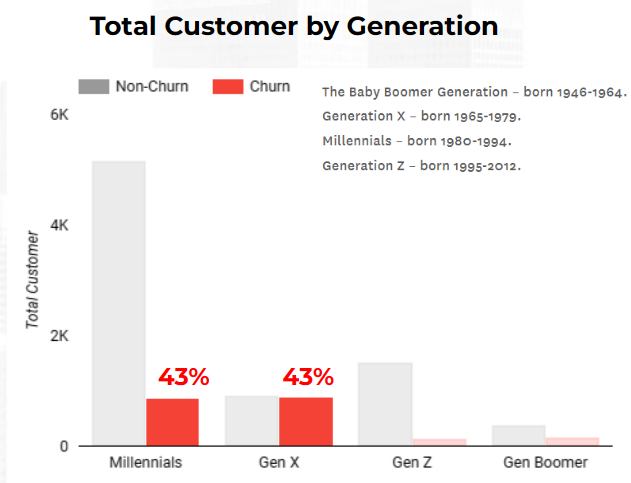

Insight:
    
86% churned customer came from generation millennials and generation X. The bank need to keep those generation who are still using their product, especially the one with generation millennials.

#### Total Customer by Tenure

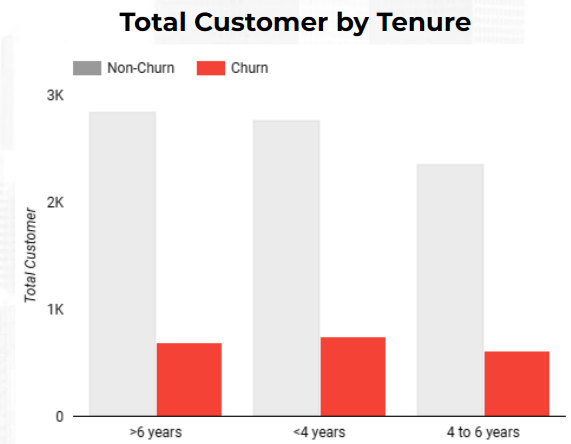

Insight:
    
There are no specific reason by which tenure segment that mostly affecting churned customer.

#### Total Customer by Balance

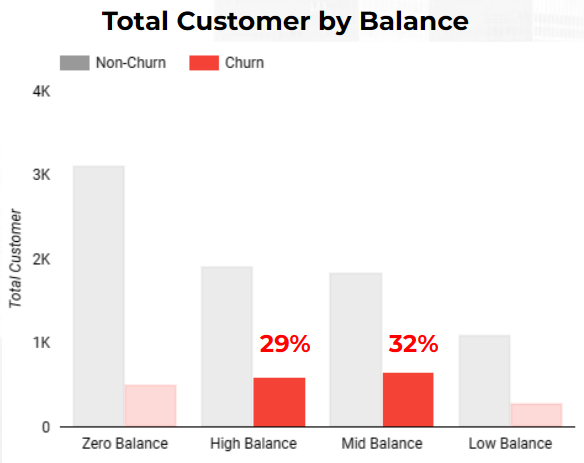

Insight:

61% churned customer came from those who had mid-high balance on their bills. The bank need to keep those who still remained using their product but with the same balance like churned customer.

#### Total Customer by Owned Product

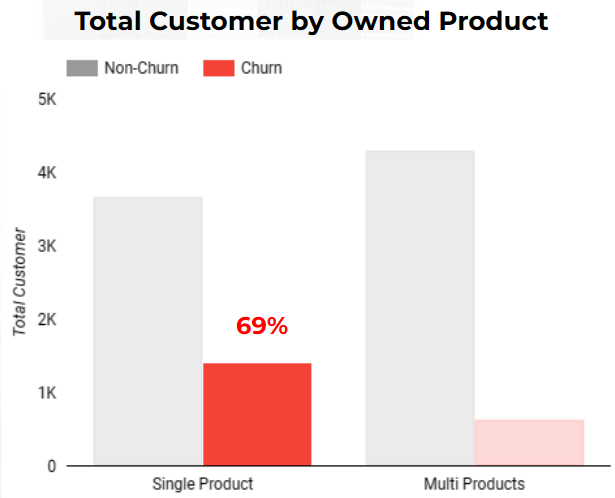

Insight:

69% of churned customer because they only own one type product. The quality of the bank's product need to be questioned.

#### Total Customer by Owned Credit Card

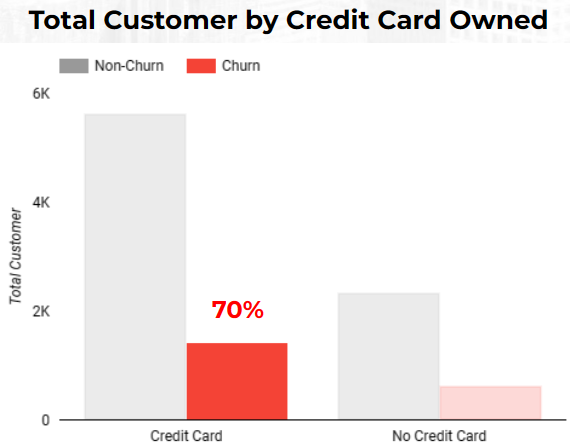

Insight:

70% churned customer surprisingly have the credit card on their account. The quality of those card need to be questioned.

#### Total Customer by Activity

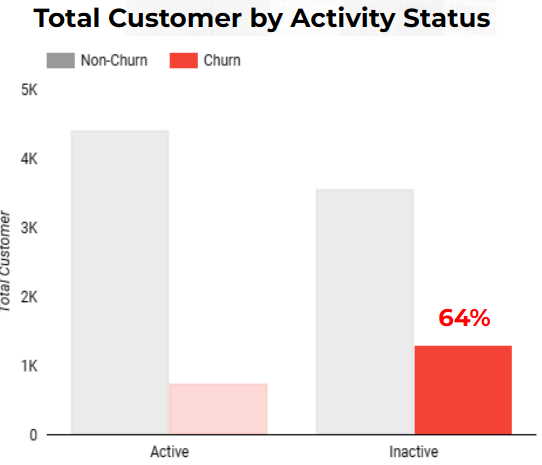

Insight:

64% of churned customer not actively doing transaction on their last time. Need to dig deeply the reason why they don't actively doing transaction last time.

#### Total Customer by Salary

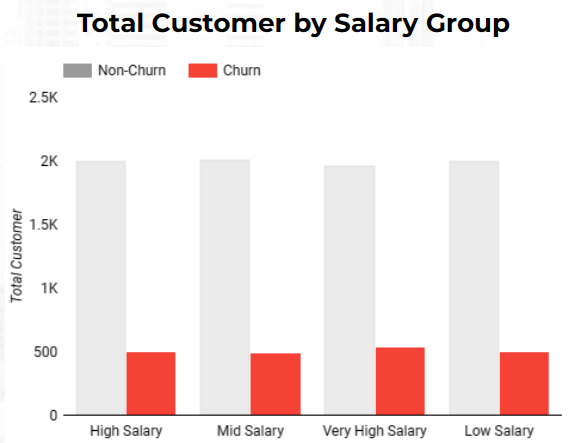

Insight:

There are no specific reason by which salary segment that mostly affecting churned customer.

#### Total Churned Vs Retained Customer by Gender-Activity

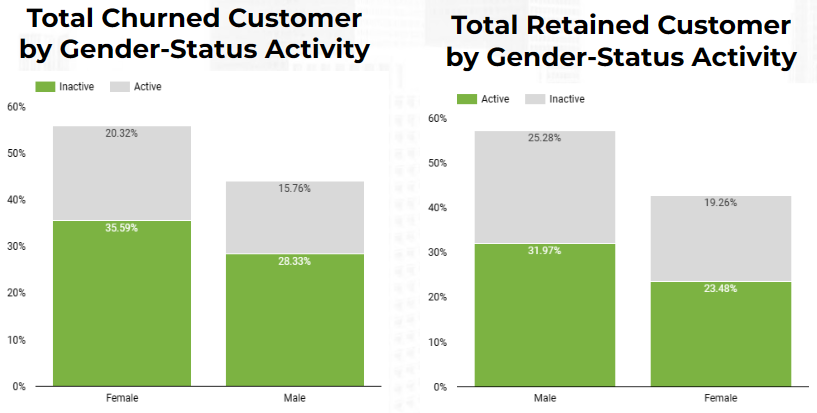

Insight:

Whether its the churned or retained customer, male is the majority class that contained inside two of them. However, if we looking at their activity, the proportion between the active and inactive is likely same.<br>
Therefore, the marketing team can focus making a new strategy on both gender but different status activity.

#### Total Churned Customer by Generation

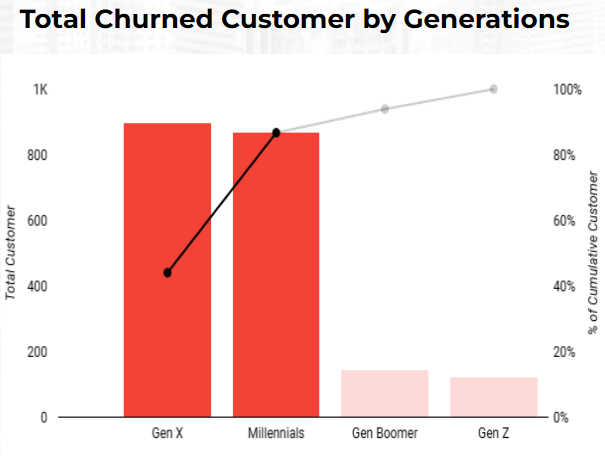

Insight:

Based on pareto principle, more than 80% of churned customer came form generation millenials and generation X. We suggest that the marketing team need to focus making a new strategy for those two generation.

#### Total Churned Customer by Balance in Millennials and Gen X

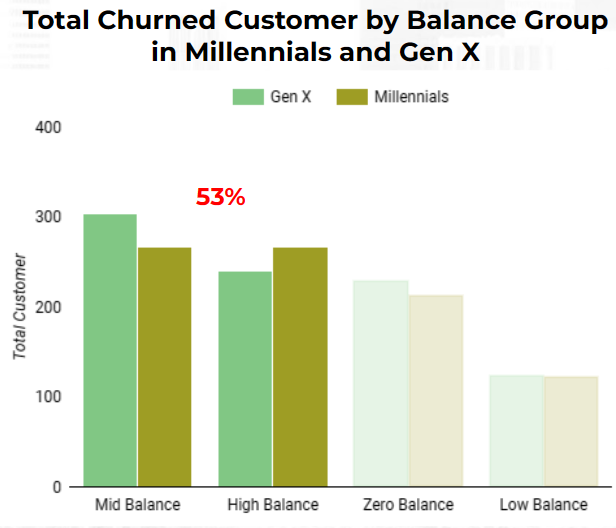

Insight:

53% churned customer from those generations have the balance range around mid and high amount balance. Therefore, marketing team need to creating a new strategy with those balance group.

#### Total Churned Vs Retained Customer by Activity in Millennials and Gen X

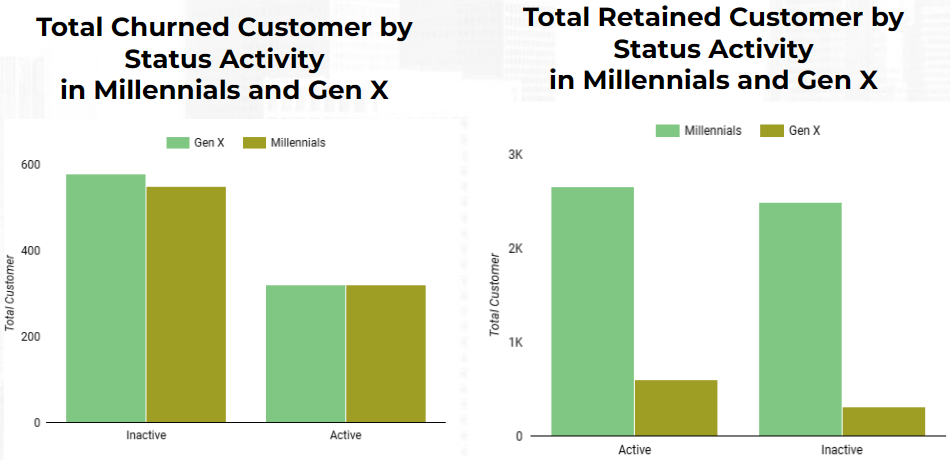

Insight:

We can see the reason why there are churned customer that came from those generations is because mostly they inactively doing transactions on their last time.<br>

The worst case is, it can happen again if marketing team don't plan the good strategy for preventing the retained customer becoming churn.<br>

We suggest that marketing team creating strategy plan with two ways i.e. those that are for active retained customer and inactive retained customer.

#### Total Customer by Credit Card in Millennials and Gen X

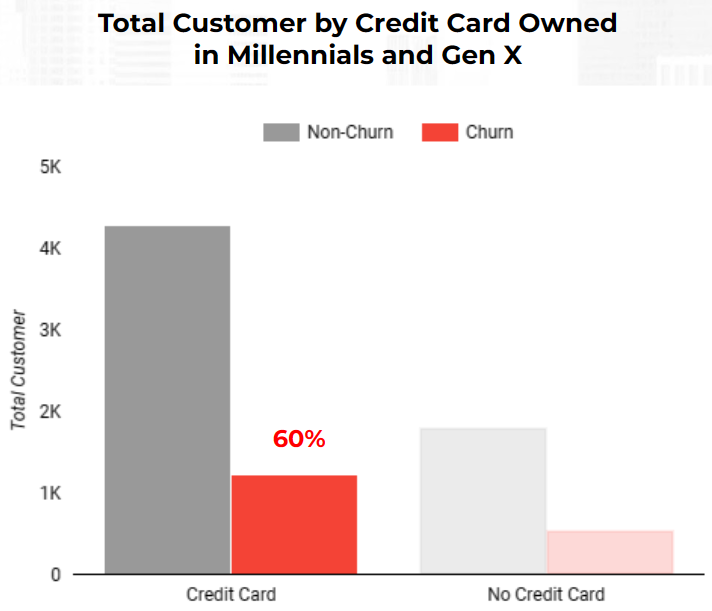

Insight:

60% churned customer that came from those generations have credit card. Therefore we suggest to check out their credit card score.

#### Total Customer by Credit Score in Millennials and Gen X

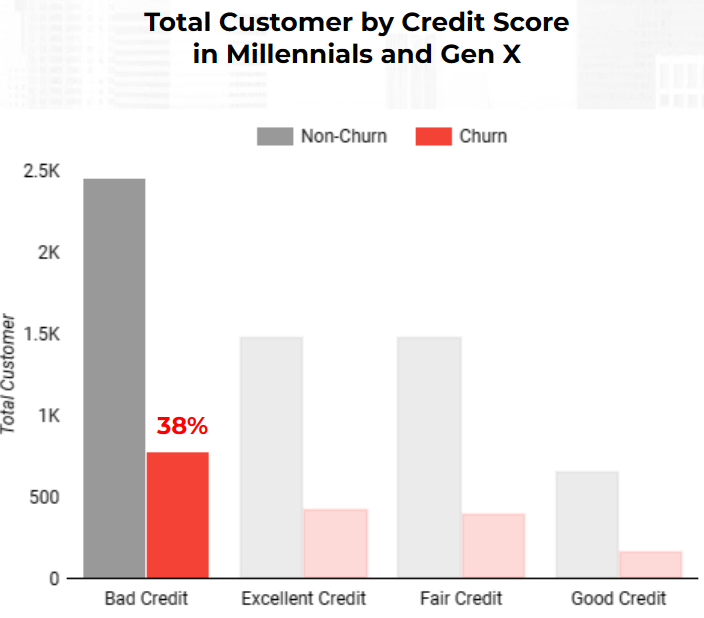

Insight:

38% churned customer that came from those generations have bad credit score on their accounts. We suggest marketing team need to prevent those with the same credit score but still remain using our product.

#### Total Customer by Country in Millennials and Genx with Bad Credit Score

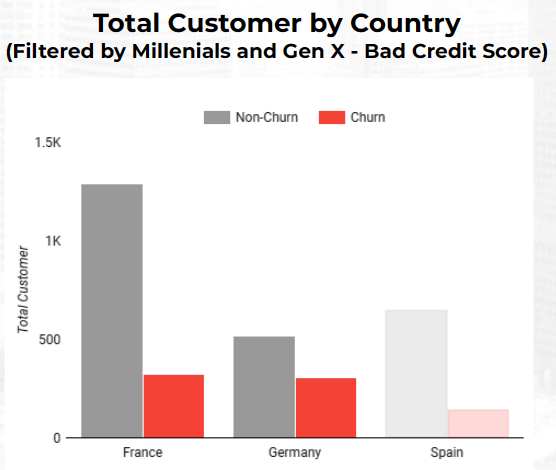

Insight:

Mostly churned customer that came from those generation with bad credit score happened around France and Germany. We suggest to do some investigate or research about their lifestyle. 

#### Total Customer by Owned Product in Millennials and Gen X with Bad Credit Score

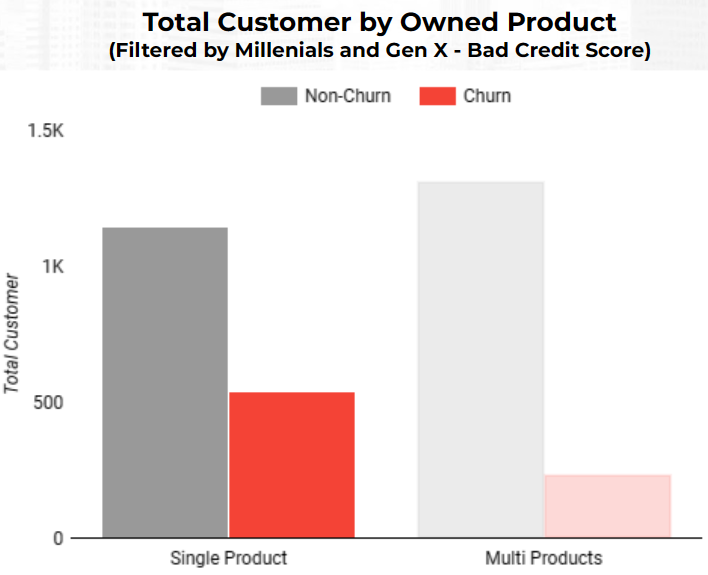

Insight:

Mostly churned customer that came from those generations with bad credit score happened to those who only use single product. Marketing team need to create some strategy so that the remaining customer also don't only use one product.

### Conclusion

>1. 20% Customer was churned.
2. 45% churned customer have bad credit score.
3. 80% churned customer came from France and Germany.
4. Ratio of churned customer between Male and Female is 44%-56%.
5. 86% of churned customer came from Millennials and Gen X.
6. 61% of churned customer had mid and high amount of balance.
7. 69% of churned customer only own 1 product.
8. 70% of churned customer had credit card.
9. 64% of churned customer were inactive.

> Some addition of valuable insight;
>1. Ratio between active and inactive customer are 56:44.
2. 86% of churned customer came from Millennials and Gen X.
3. Their generation had mid and high amount of balance.
4. Their generation churned because mostly inactive.
5. Their generation had credit card.
6. However, they had bad credit score.
7. Probably because they only own 1 product.

## Business Recommendation

1. Give a loyalty reward program such as point if the active customer that came from Millennials and Gen X who have mid and high balance, often doing transaction activity.
2. Give a push notification via message phone to the French inactive customer with the content of notification is promoting a shopping discount in certain merchant if they buy spesificly lifestyle product.
3. Give a push notification via message phone to the German inactive customer with the content of notification is promoting a shopping discount in certain merchant if they buy spesificly luxury product.
4. Increasing the quality of bank's product so the customer interest to buy the other product.
5. Give a cut-off of loan interest for the customer who have bad credit score.

## Data Cleansing

In [1]:
# Kode untuk export data 

##df_bank.to_csv(r"C:\Users\Hans\Rakamin\Rakamin Final Project\banking.csv", index = False)

In [4]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
10000 - (10000 * 0.1)

9000.0

In [11]:
10000 - 9000

1000

In [10]:
data = pd.pivot_table(data = df,
                      values = 'Balance',
                      index = 'Exited',
                      aggfunc = {'Balance': 'sum'}).round()
data
                      

Balance
Exited             
0       579270798.0
1       185588095.0

In [11]:
579270798.0 + 185588095.0

764858893.0

In [12]:
185588095.0 / 764858893.0

0.24264357347283927

In [20]:
data = pd.pivot_table(data = df,
                      values = 'NumOfProducts',
                      index = 'Exited',
                      aggfunc = {'NumOfProducts': 'sum'}).round()
data

NumOfProducts
Exited               
0               12297
1                3005

In [23]:
3005 / (3005 + 12297)

0.19637955822768266

In [24]:
data = pd.pivot_table(data = df,
                      values = 'CreditScore',
                      index = 'Exited',
                      aggfunc = {'CreditScore': 'sum'}).round()
data

CreditScore
Exited             
0           5190707
1           1314581

In [25]:
1314581 / (1314581 + 5190707)

0.202078831867244

Kesimpulan data churn

1. kehilangan 24.2% saldo dari keseluruhan saldo
2. kehilangan 19.6% jumlah produk bank yang dibeli
3. kehilangan 20.2% jumlah kredit skor

In [26]:
data = pd.pivot_table(data = df,
                      values = 'HasCrCard',
                      index = 'Exited',
                      aggfunc = {'HasCrCard': 'sum'}).round()
data

HasCrCard
Exited           
0            5631
1            1424

In [27]:
1424 / (1424+5631)

0.20184266477675408

In [28]:
df.CreditScore.max()

850

In [4]:
df.CustomerId.value_counts()

CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64